In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## BW #50: Red Sea shipping

We're now more than three months into the war between Israel and Hamas. While I have many thoughts on the war, this issue focuses on an unexpected war-related development, specifically, the Houthi rebels in Yemen expressing their solidarity with Hamas by attacking ships in the Red Sea. (They claim to be attacking ships that are owned by or trading with Israel, but that turns out not to be the case.)

Shipping companies are now paying more in insurance to go through the Red Sea, or they're rerouting their ships to go around the Cape of Good Hope in South Africa. Either way, it would seem that these Yemeni rebels' actions are responsible for a rise in inflation.

NPR's Planet Money reported on this topic earlier this month (<https://www.npr.org/2024/01/02/1197959330/red-sea-tensions-global-shipping>), and Marketplace had a story on it as well (<https://www.marketplace.org/2024/01/17/red-sea-attacks-houth-rebels-shipping-rates/>).

### Data

This week's data comes from PortWatch (https://portwatch.imf.org/), a joint project between the International Monetary Fund and the University of Oxford that was launched in November. They aim to track ships and ports around the world, and to give us insights into what's happening on those fronts.

We'll look at three related data sets, all describing the traffic of cargo ships and oil tankers:

1. The number of ships passing through Bab el Mandeb, the "Strait of Tears" at the entrance to the Red Sea
2. The number of ships passing through the Suez Canal
3. The number of ships going past the Cape of Good Hope, in South Africa.

All three of these can be downloaded from the PortWatch page, "Trade disruptions in the Red Sea" (<https://portwatch.imf.org/pages/573013af3b6545deaeb50ed1cbaf9444>). Click on the "export data" link next to each graph, and choose the CSV export. (The Excel export produces an HTML file, rather than an actual Excel file, despite the ".xls" extension.)

### Tasks

The learning goals for this week's questions include:

- Creating a single data frame from several files
- Working with date/time values, including resampling
- Window functions
- Plotting

### Tasks

1. Create a dictionary of data frames, in which the keys are short (3-5 letter) nickname for the data source, and the values are data frames, one for each of the three CSV files. In each data frame, the original "DateTime" column should be the index, and parsed as a "datetime" dtype. Keep only the "Number of Cargo Ships" and "Number of Tanker Ships" columns, renamed to something shorter.
2. Join these three data frames together into a single data frame with six columns (two from each of the original data frames).
3. What is the mean number of cargo ships we see in each location each month? Create a line plot graphing it. Do we see any indication of the conflict's influence over the last few months?
4. Create a line plot showing the number of oil tankers in each location during each week, starting the first week of September 2023. Did the problems start immediately after the Hamas attack of October 7th?
5. When was the number of ships (of either type) going through the Suez Canal at a minimum?
6. Some of those low numbers are from March 2021, when a large tanker (the Evergreen) got stuck in the Suez Canal and blocked traffic. Show, for both the Suez Canal and Bab el Mandeb, the smallest and largest number of ships for each rolling 3-day period from March 15, 2021 through April 1st.
7. Calculate, for each 3-month period (quarter) in our data set, the mean number of ships of each type, in each location. Now calculate the percentage change in that mean for each quarter. Where is the greatest increase for each location? Where is the greatest decrease?

#### 1. Create a dictionary of data frames, in which the keys are short (3-5 letter) nickname for the data source, and the values are data frames, one for each of the three CSV files. In each data frame, the original "DateTime" column should be the index, and parsed as a "datetime" dtype. Keep only the "Number of Cargo Ships" and "Number of Tanker Ships" columns, renamed to something shorter.

In [28]:
data = {}
for file in Path("./data/").glob("*.csv"):
    data[file.stem.split("-")[0]] = pd.read_csv(
        file,
        index_col="date",
        parse_dates=["date"],
        usecols=[0, 1, 2],
        names=["date", "tanker", "cargo"],
        skiprows=1,
        date_format="%Y-%m-%d %H:%M:%S",
    )

In [29]:
data

{'bab':             tanker  cargo
 date                     
 2019-01-01      33     23
 2019-01-02      41     18
 2019-01-03      41     18
 2019-01-04      31     16
 2019-01-05      55     21
 ...            ...    ...
 2024-01-24      20      9
 2024-01-25      16     12
 2024-01-26      19     11
 2024-01-27      19     10
 2024-01-28      19      9
 
 [1854 rows x 2 columns],
 'suez':             tanker  cargo
 date                     
 2019-01-01      63     22
 2019-01-02      41     10
 2019-01-03      41     24
 2019-01-04      33     15
 2019-01-05      31     13
 ...            ...    ...
 2024-01-24      22     16
 2024-01-25      28     17
 2024-01-26      29     10
 2024-01-27      25      9
 2024-01-28      37     15
 
 [1854 rows x 2 columns],
 'cape':             tanker  cargo
 date                     
 2019-01-01      43     12
 2019-01-02      17      5
 2019-01-03      44     16
 2019-01-04      25     11
 2019-01-05      39     21
 ...            ...    ...
 20

#### 2. Join these three data frames together into a single data frame with six columns (two from each of the original data frames).

In [31]:
df = pd.concat(data, axis="columns")

#### 3. What is the mean number of cargo ships we see in each location each month? Create a line plot graphing it. Do we see any indication of the conflict's influence over the last few months?

In [37]:
df.loc[:, (slice(None), "cargo")]

,bab,suez,cape
,cargo,cargo,cargo
date,,,
2019-01-01,23,22,12
2019-01-02,18,10,5
2019-01-03,18,24,16
2019-01-04,16,15,11
2019-01-05,21,13,21
...,...,...,...
2024-01-24,9,16,13
2024-01-25,12,17,20


<Axes: xlabel='date'>

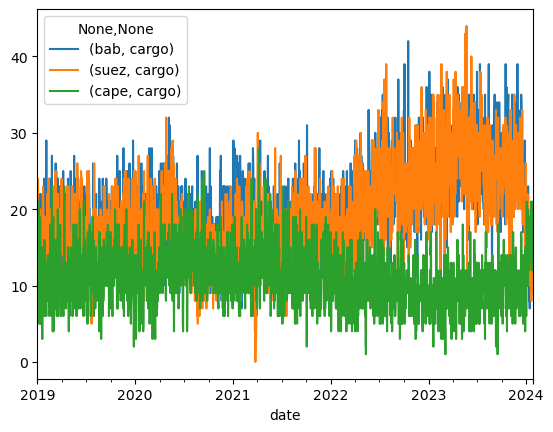

In [36]:
df.loc[:, (slice(None), "cargo")].plot()